# Del 2 - Dataanalys diamanter

## Antagande om Guldfynd:

- Guldfynd letar primärt efter enstaka diamanter per smycke för varje prisklass som defineras här under
- 30% av slutpriset hos ett smycke går till inköp av diamanter och att inköpspriset samt försäljningspriset är i sek.
- Icke-numeriska kvalitativa attribut värderas lika högt från bästa till sämsta
- Guldfynd har önskade (och i rapporten antagna) minstakrav på varje kvalitetsatribut
- Att detta är ett mindre pilotprojekt för ett mindre antal av företagets butiker och att inköp till detta sker utifrån datasettet
-  Att datasettet är representativt av den större diamantmarkaden

### Antagande om priskategorier för försäljningspristet av smycken samt andelen av diamantprodukter i deras sortiment:
- budgetprodukter - <2500 sek, 40% av soritmentet
- midrangeprodukter - 2500 - 6000 sek, 35% av sortimentet
- lägre premium - 6000 - 20000 sek, 15% av sortimentet
- högre premium - 20000+ sek, 10% av sortimentet

## Bakgrund
I följande analys tolkas vårt dataset för diamanter och potentiella fokusområden utifrån vår tillgängliga data och för varje prissegment.
Vi sätter även upp ett system för att kvantifiera icke-numerisk kvalitetsdata, där ett lägre värde innebär högre kvalitet på diamanten. Detta för att undvika att datapunkter med fler typer påverkar kvalitetspoängen i en högre grad än för datapunkter med färre typer. Detta innebär att en diamant med kvalitetspoäng 0 har en ideel slipning, högsta klarhet och bästa färg och att en diamant med kvalitetspoäng 17 har den sämsta graden av samtliga attribut.
För att förenkla analysen har även datapunkterna table, x, y och z ignorerats då dessa ungefärligt beskrivs av karat och slipningsgrad.

In [10]:
from functions import *

df = pd.read_csv("diamonds.csv")

budget_products = (0, 2500 * 0.3)
midrange_products = (2500 * 0.3, 6000 * 0.3)
lower_premium_products = (6000 * 0.3, 20000 * 0.3)
higher_premium_products = (20000 * 0.3, df["price"].max())

## Kontroll av datasett
nedan gör vi en snabb kontroll av vårt kompletta dataset för en snabb överblick.

In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Från första blick ser datan korrekt ut, om man tar en titt på minimum värderna ser det ut som att dimentionerna på minst en diamant är okomplett, vi tar en titt på dessa utifall andra datatyper på just dessa diamanter skulle kunna påverka vår analys.

In [12]:
datapoints_dimentions_with_zero = df[(df["x"] == 0) | (df["y"] == 0) | (df["z"] == 0)]
print(f"datapoints with invalid values {len(datapoints_dimentions_with_zero.index)}")
datapoints_dimentions_with_zero

datapoints with invalid values 20


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


20 st datapunkter saknar åt minstånde en av volymaxlarna, men det finns fortfarande betydelsefull data att använda sig av i dessa datapunkter i form av karat och cut, så de kommer få vara kvar i settet.

## hur ser den kvantitativa distrubitonen ut för lätttolkade datapunkter, prisintervall och karat?

Utifrån följande information kan vi se att majoriteten av vår data består av mindre billigare diamanter, samt att antalet diamanter i karatklassen runt 2.5 faller kraftigt.
 Men finns det en korrelation mellan prisgrupp och karat?


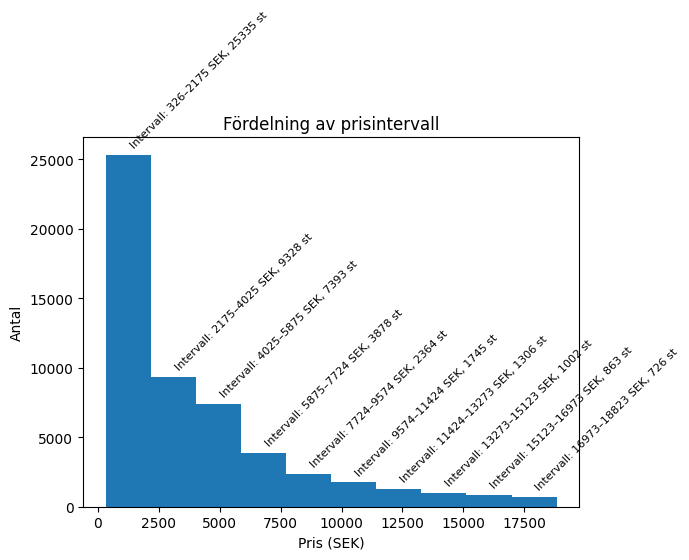

In [13]:
distribution_price_group(df)

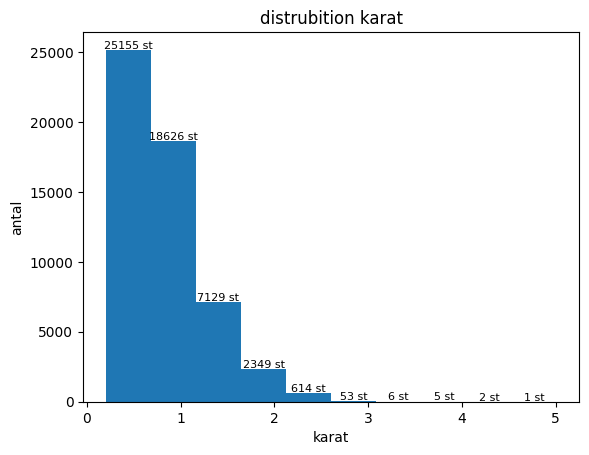

In [14]:
distribution_carat(df)

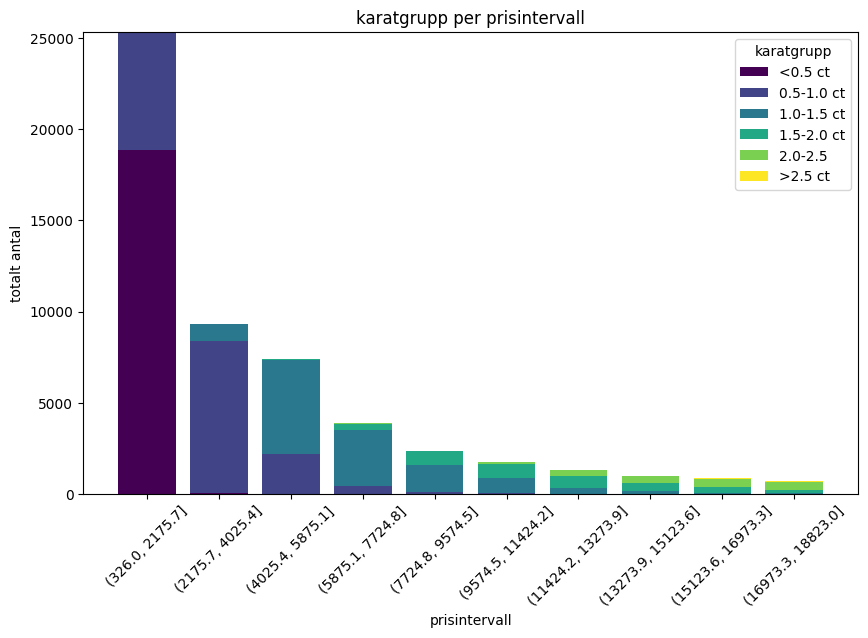

In [15]:
carat_price_interval(df)

Utifrån diagrammet ovan ser vi en tydlig korrellation mellan karatgrupp och prisnivå, men hur korrelerar kvaliten med denna insikt?

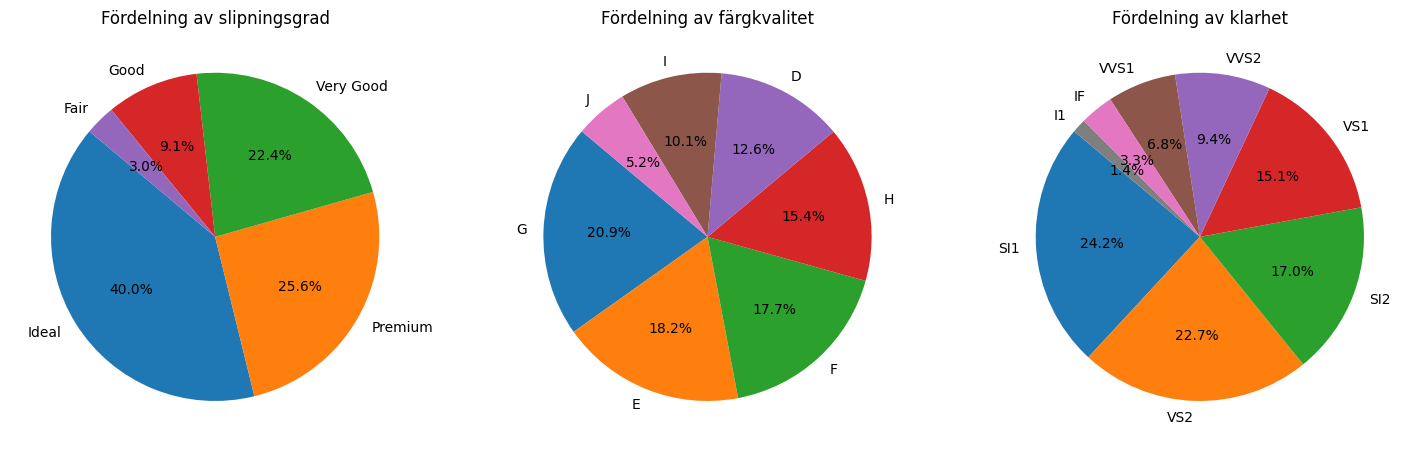

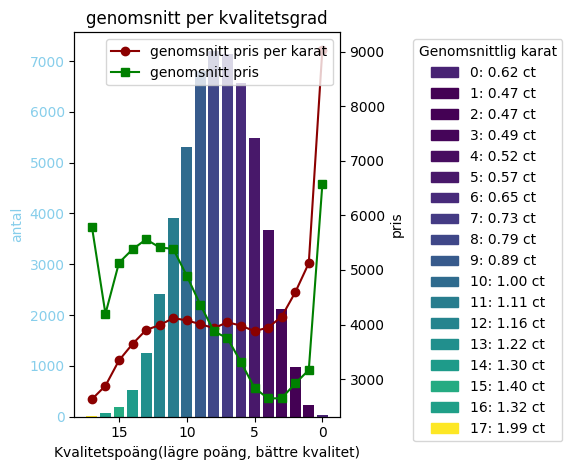

In [16]:
quality_piecharts(df)
quality_point_barchart_carat_and_price_avgs(df)

## spridning per kvalitetsattribut
- nästan 2/3 av diamanterna håller sig i slipningsgraden ideal/premium, de två högsta
- färgkvaliten håller sig relativt jämt fördelad över alla färggrader
- nästan hälften av klarhetsgraderna håller sig i segmentet SI1 och VS2 (ungefär motsvarande av "mitten" av skalan)

## spridning per poänggrad
- gruppen 10 - 12 håller sig rätt lika i genomsnittligt pris per karat
- karatstorleken faller över hela datasettet, undantag på kvalitetsgrad 0 och 15
- pris per diamant har en faller över datasettet med undantag på de lägsta och högsta poänggraderingarna

#### 1. Budgetsegment
Nedan visas kvalitetsdistrubitionen för vårt lägsta prissegment innehållande totalt 8428 diamanter. För att bibehålla en relativt hög kvalitetsgrad väljer vi att filtera på endast de diamanter med kvalitetsattribut med följande lägstagrad:
- slipningsgrad - Very good
- färgkvalitet - H
- klarhet - SI1

Vi får vi ett filter på de 4855 diamanter i denna kvalitetsklass. Detta motsvarar ungefär 57.6% av diamanterna i datasettet. Om vi skulle öka kvalitetsgraden skulle vi ha problem att uppfylla önskan om att hålla detta som vår största marknadsdel då antalet diamanter sorterade på kvalitet skulle falla kraftigt, och därmed rekomenderar jag detta som lägsta kvalitetsgrad för budgetsegmentet. Som primär fokus bör kvalitetsgraden ligga mellan 9 och 4 för större andelen av våra inköp, med fokus på högre kvalitet för produkter längre upp i segmentet för att kunna rättfärdiga den ökade kvaliten i vår marginal.

Antal diamanter i prisklassen: 8428


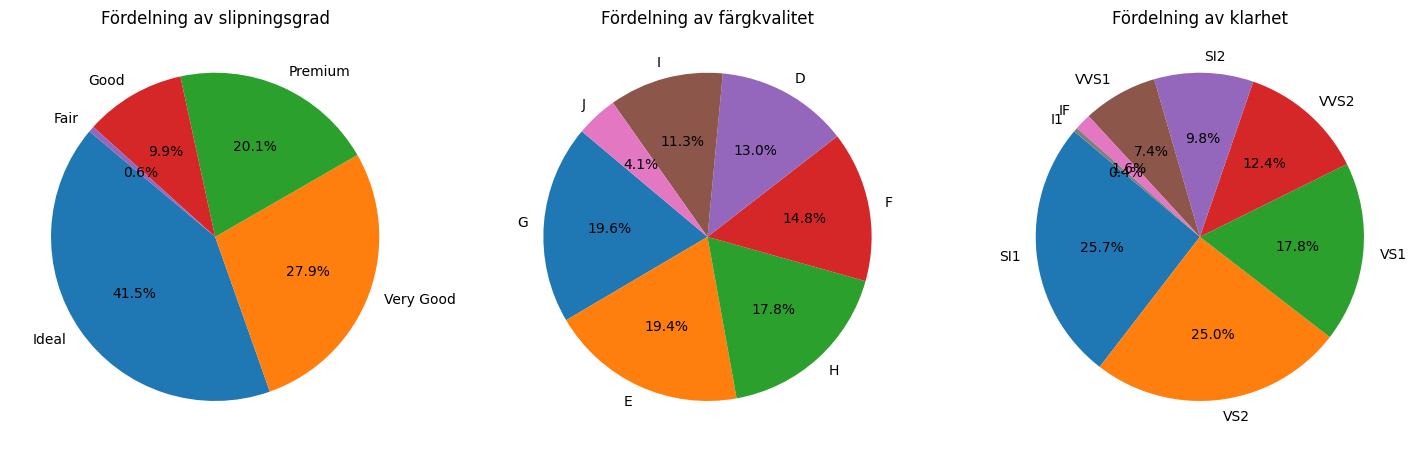

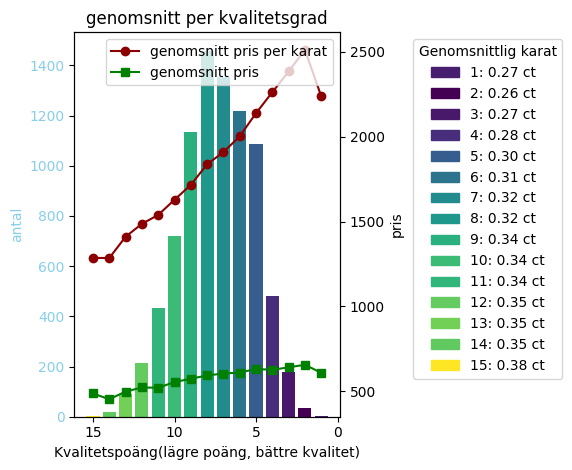

Antal diamanter sorterat efter kvalitet: 4855


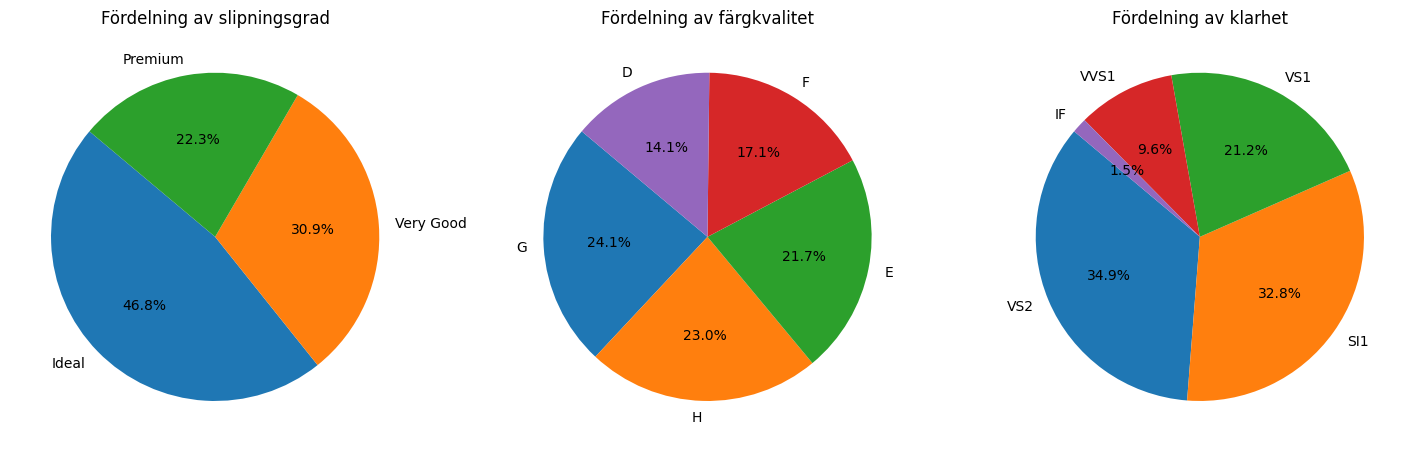

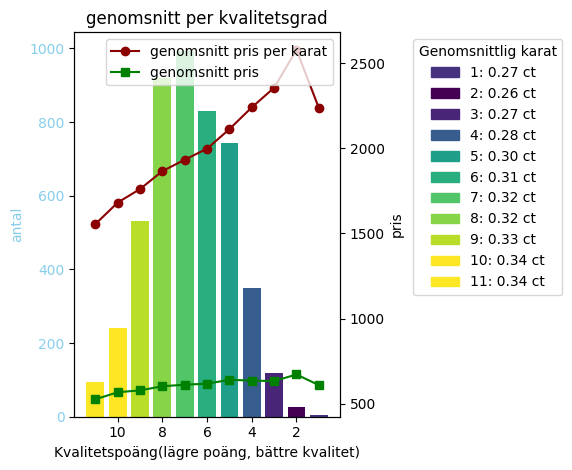

In [17]:
df_budget = selection_per_product_group(df, budget_products)
df_budget_sorted_quality = selection_quality(df_budget, ("Ideal", "Premium", "Very Good"), ("D", "E", "F", "G", "H"), ("IF", "VS1", "VS2", "VVS1", "VVS1", "SI1"))

print(f"Antal diamanter i prisklassen: {len(df_budget)}")
quality_piecharts(df_budget)
quality_point_barchart_carat_and_price_avgs(df_budget)

print(f"Antal diamanter sorterat efter kvalitet: {len(df_budget_sorted_quality)}")
quality_piecharts(df_budget_sorted_quality)
quality_point_barchart_carat_and_price_avgs(df_budget_sorted_quality)

#### 2. Midrange segmentet

När vi går vidare till vårt nästa prissegment ser vi redan att antalet diamanter har ökat till 14091, detta ger oss lite större frihet att höja kvalitetsgraden på våra krav till följande:
- slipningsgrad - Very good
- färgkvalitet - G
- klarhet - VS2

Detta ger oss 6740 diamanter, en lägre procentuell andel på antalet diamanter i utfallet, ~47.8%, men om vi förväntar oss en 35% andel av våra produkter i detta segment har vi fortfarande en större tillgång till val även med dessa minimumkrav. Här rekomenderas ett primärt fokus på kvalitetsklasserna 7 till 2 för större andelen av våra inköp.

Antal diamanter i prisklassen: 14091


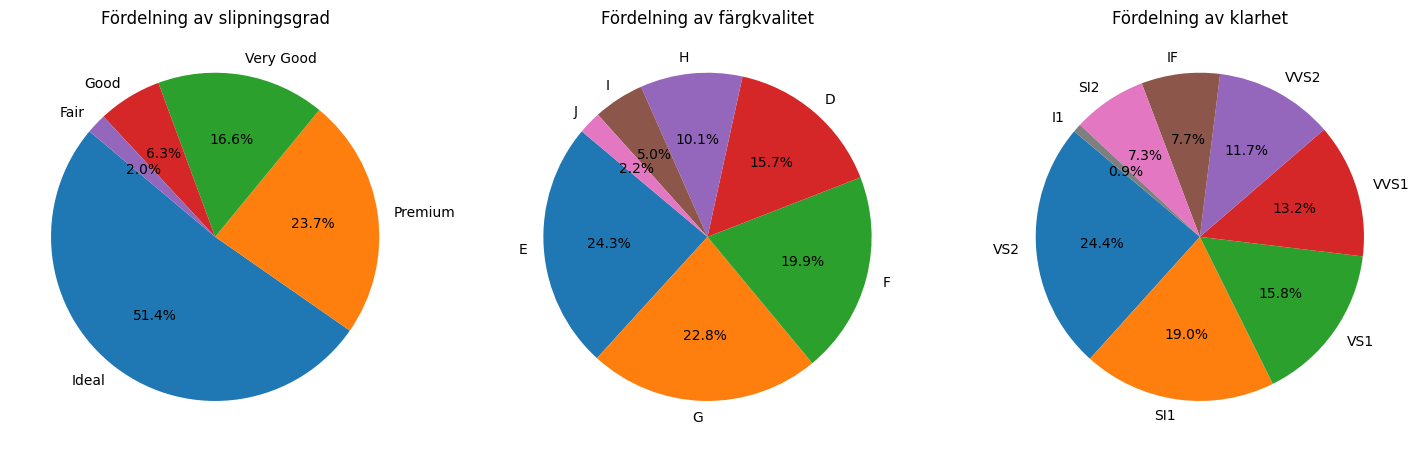

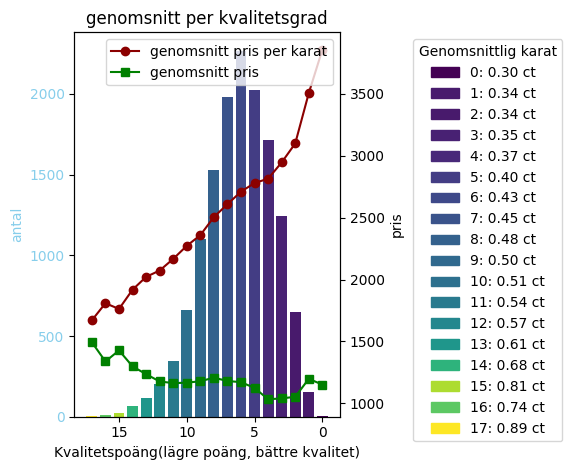

Antal diamanter sorterat efter kvalitet: 6740


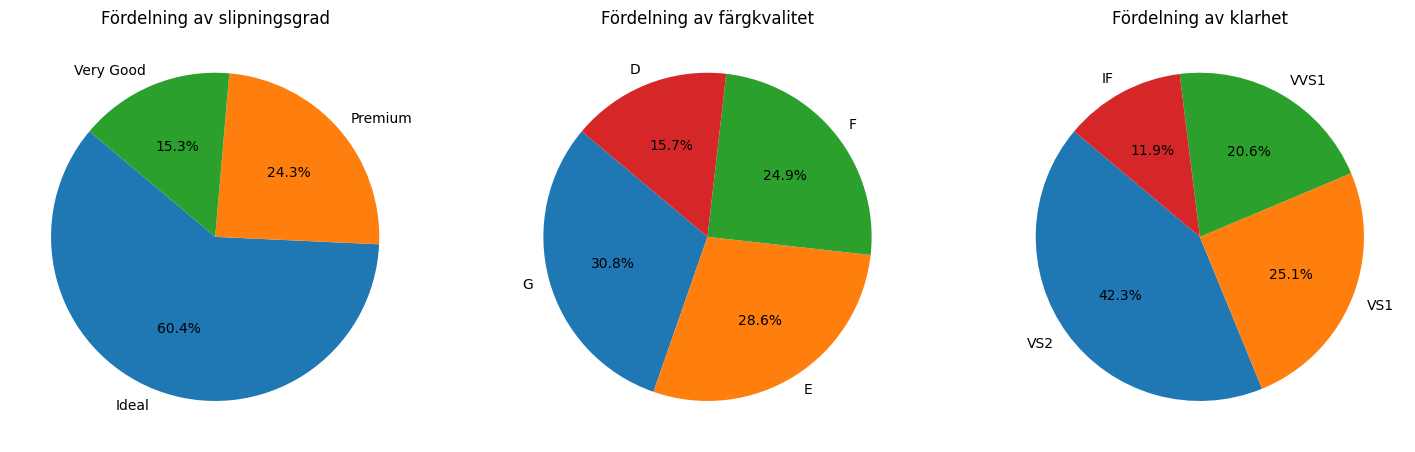

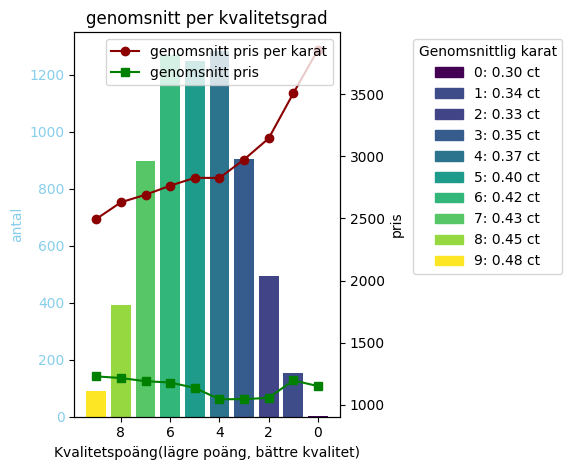

In [18]:
df_midrange = selection_per_product_group(df, midrange_products)
df_midrange_sorted_quality = selection_quality(df_midrange, ("Ideal", "Premium", "Very Good"), ("D", "E", "F", "G"), ("IF", "VS1", "VS2", "VVS1", "VVS1"))

print(f"Antal diamanter i prisklassen: {len(df_midrange)}")
quality_piecharts(df_midrange)
quality_point_barchart_carat_and_price_avgs(df_midrange)

print(f"Antal diamanter sorterat efter kvalitet: {len(df_midrange_sorted_quality)}")
quality_piecharts(df_midrange_sorted_quality)
quality_point_barchart_carat_and_price_avgs(df_midrange_sorted_quality)

#### 3. Lägre Premium

I vårt lägre premium segment hittar vi den största andelen av diamanter i vårt dataset, 19870 st, men vi har även en större andel av våra diamanter i lägre kvalitetsgrad, runt grad 9. Däremot har vi mycket större spridning av karat, där genomsnittet skiljer sig över 1 ct från lägsta till högsta kvalitetsgrad. I detta fall har jag valt att behålla den lägsta kvalitetsgraden från midrange segmentet ovan:
- slipningsgrad - Very good
- färgkvalitet - G
- klarhet - VS2

Vilket ger oss 3928 diamanter, ~19.7% av segmentet, som jag anser är en godtagbar andel för denna andel av sortimentet.
För detta segment rekomenderar jag kvalitetsklasser mellan 7 och 3 för största valmöjlighet.
Dessa diamanter innehåller dock i genomsnitt diamanter i lägre karat. Hade vi hade önskat att få in större diamanter i sortimentet hade vi fått sänka kvalitetsgraden ytterligare.

Antal diamanter i prisklassen: 19870


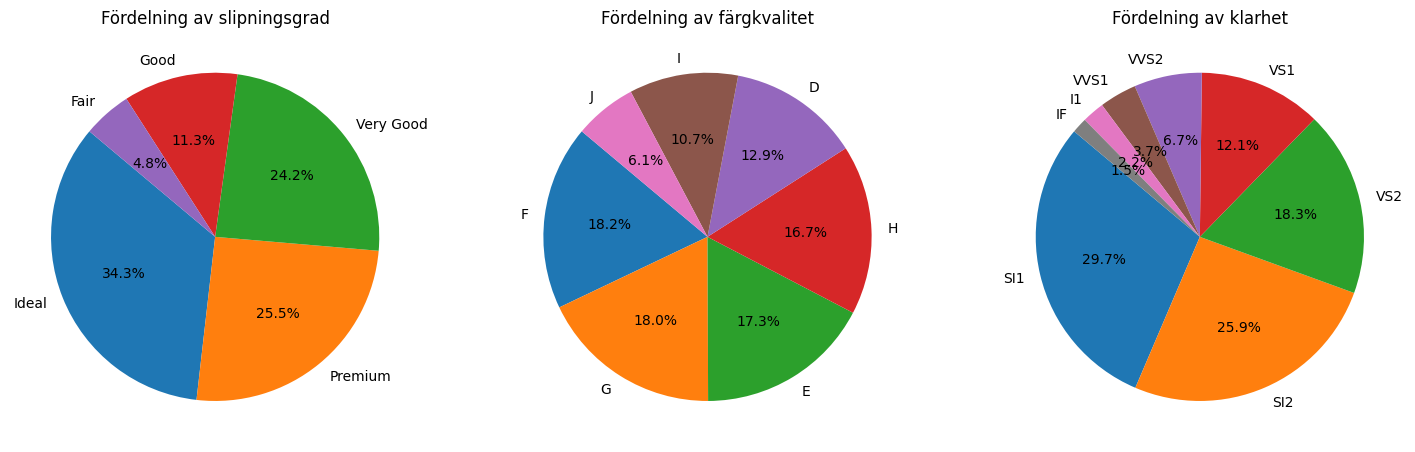

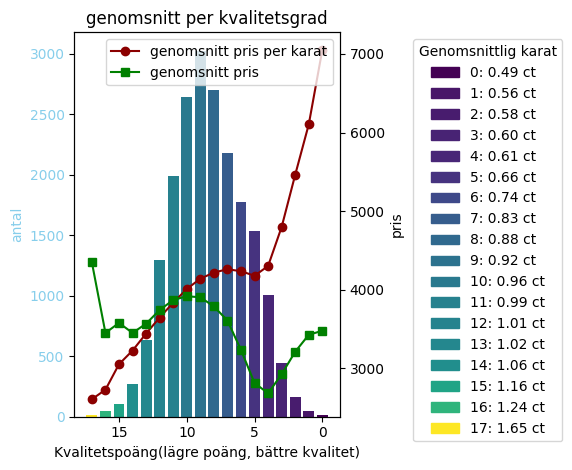

Antal diamanter sorterat efter kvalitet: 3928


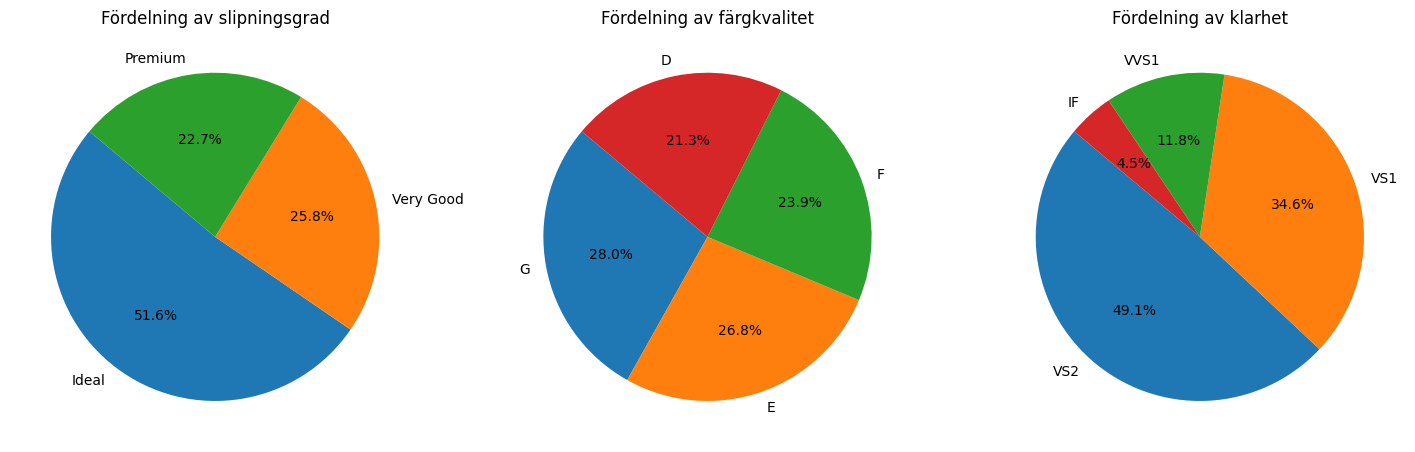

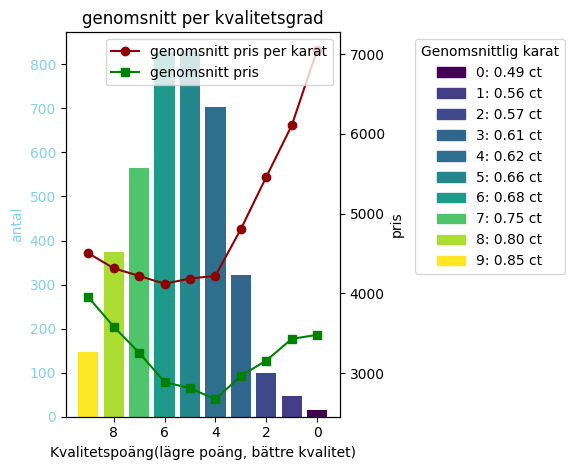

In [19]:
df_lower_premium = selection_per_product_group(df, lower_premium_products)
df_lower_premium_sorted_quality = selection_quality(df_lower_premium, ("Ideal", "Premium", "Very Good"), ("D", "E", "F", "G"), ("IF", "VS1", "VS2", "VVS1", "VVS1"))

print(f"Antal diamanter i prisklassen: {len(df_lower_premium)}")
quality_piecharts(df_lower_premium)
quality_point_barchart_carat_and_price_avgs(df_lower_premium)

print(f"Antal diamanter sorterat efter kvalitet: {len(df_lower_premium_sorted_quality)}")
quality_piecharts(df_lower_premium_sorted_quality)
quality_point_barchart_carat_and_price_avgs(df_lower_premium_sorted_quality)

#### 4. **Högre Premium**

I vårt övre segment finner vi 11551 diamanter, fördelat runt en något högre kvalitetsgrad jämfört med vårt föregående segment, runt 7. Där segmentet däremot skilljer sig mer markant är genosnittsgraden av diamanterna. Där endast toppsegmentet av 0 ligger under en karat.

Som i våra föregående segment väljer jag här att lägga vårt minimumfokus som följande:
- slipningsgrad - Very good
- färgkvalitet - G
- klarhet - VS2

Detta ger oss 3520 diamanter i segmentet, ~30.5% av segmentet. Här bör vi primärt fokusera på grupperna 8-4 för våra inköp. Likt det lägre premiumsegmentet bör vi sänka kvalitetsgraden om vi önskar större diamanter i dessa smycken.

Antal diamanter i prisklassen: 11551


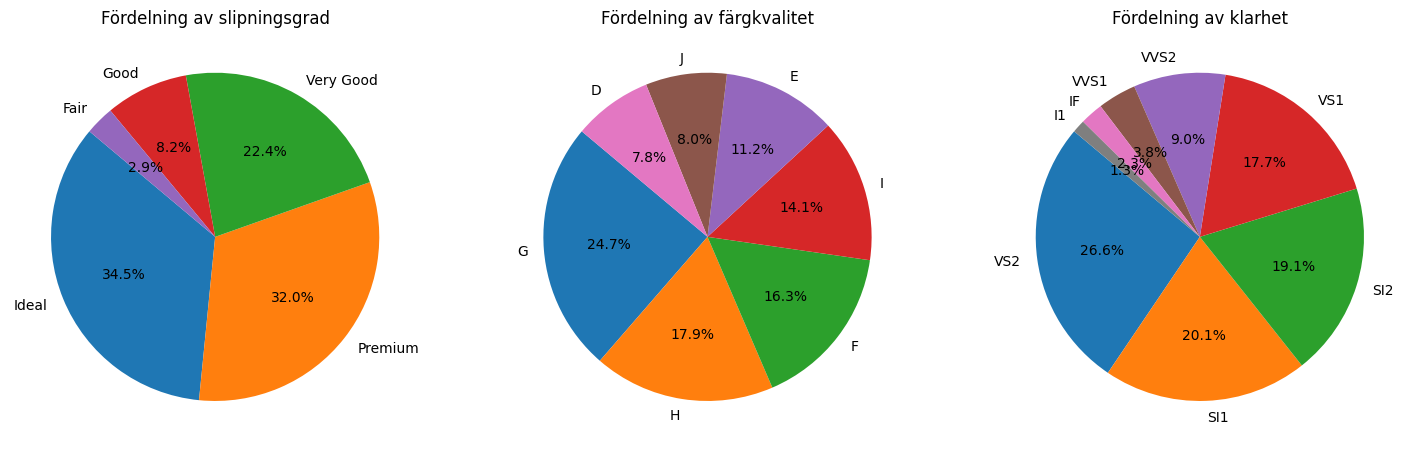

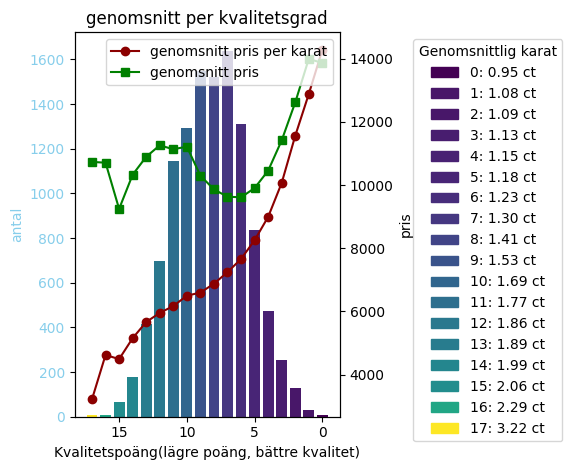

Antal diamanter sorterat efter kvalitet 3520


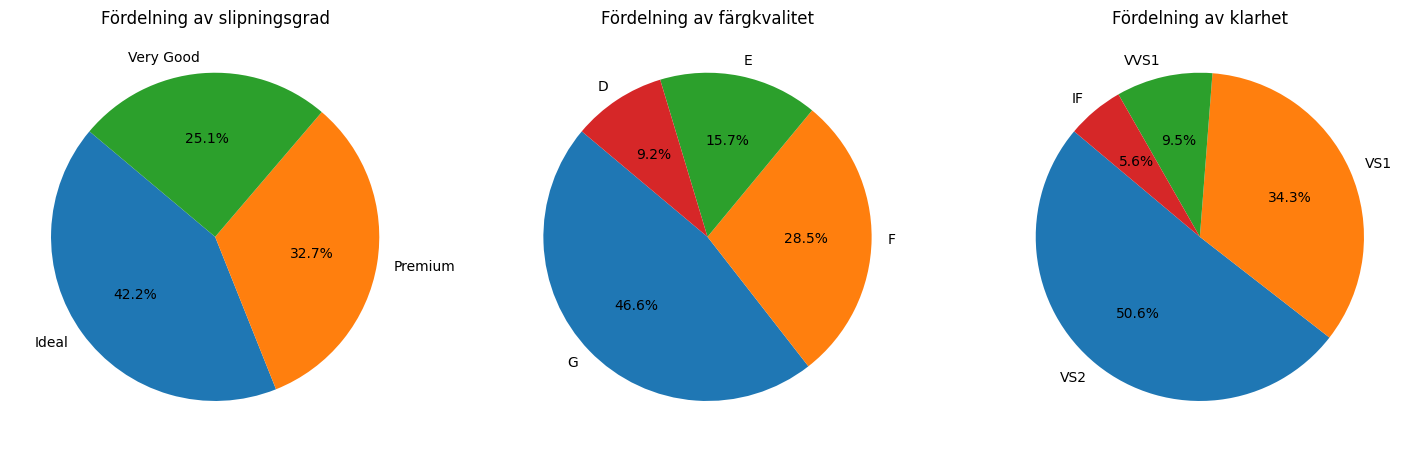

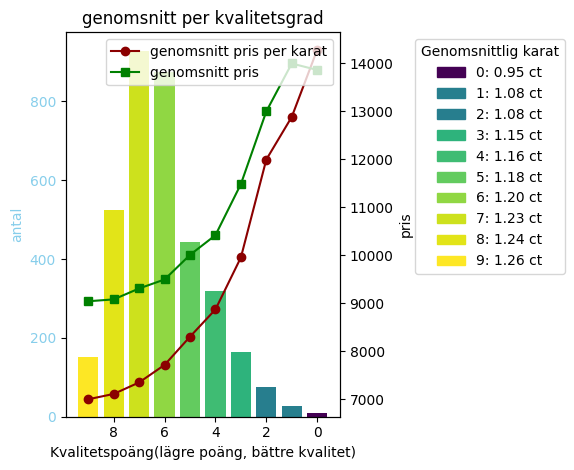

In [20]:
df_higher_premium = selection_per_product_group(df, higher_premium_products)
df_higher_premium_sorted_quality = selection_quality(df_higher_premium, ("Ideal", "Premium", "Very Good"), ("D", "E", "F", "G"), ("IF", "VS1", "VS2", "VVS1", "VVS1"))

print(f"Antal diamanter i prisklassen: {len(df_higher_premium)}")
quality_piecharts(df_higher_premium)
quality_point_barchart_carat_and_price_avgs(df_higher_premium)

print(f"Antal diamanter sorterat efter kvalitet {len(df_higher_premium_sorted_quality)}")
quality_piecharts(df_higher_premium_sorted_quality)
quality_point_barchart_carat_and_price_avgs(df_higher_premium_sorted_quality)

## Executive summary

Utifrån ovan analys rekomenderas fokus på diamanter med följande lägstagrad för midrange, lägre premium och högre premium:
- minsta slipningsgrad - Very good
- minsta färgkvalitet - G
- minsta klarhet - VS2

Vårt budgetsegment som har vi följande:
- minsta slipningsgrad - Very good
- minsta färgkvalitet - H
- minsta klarhet - SI1

### 1. Budget
- <2500 sek per smycke, 40% av soritmentet
- 4855 st diamanter med lägsta kvalitetskrav, ~57.6% av alla diamanter i prisklassen
- fokus på kvalitetsgrupper 9 - 4 för inköp
- storleksklass runt 0.3 karat i fokuserade kvalitetsgrupper

### 2. Midrange
- 2500 - 6000 sek per smycke, 35% av sortimentet
- 6740 st diamanter med lägsta kvalitetskrav, ~47.8% av alla diamanter i prisklassen
- fokus på kvalitetsgrupper 7 - 2 för inköp
- storleksklass runt 0.4 karat fokuserade kvalitetsgrupper

### 3. Lägre Premium
- 6000 - 20000 sek per smycke, 15% av sortimentet
- 3928 st diamanter med lägsta kvalitetskrav, ~19.7% av alla diamanter i prisklassen
- fokus på kvalitetsgrupper 7 - 3 för inköp
- storleksklass runt 0.6 - 0.7 karat fokuserade kvalitetsgrupper

### 3. Högre Premium
- 20000+ sek per smycke, 10% av sortimentet
- 3520 st diamanter med lägsta kvalitetskrav, ~30.5% av alla diamanter i prisklassen
- fokus på kvalitetsgrupper 8 - 4 för inköp
- storleksklass runt 1.1 - 1.2 karat fokuserade kvalitetsgrupper